# Proyecto ARIMA


In [1]:
! pip install relativeImp
# Instalacion de la libreria relativeImp

#  Series temporales. Modelos de Suavizado exponencial y ARIMA

## Series temporales I. Suavizado

En esta primera sesión vamos a explorar los métodos de inspección descriptiva de una serie temporal y, posteriormente, los primeros modelos predictivos basados en suavizado exponencial

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [3]:
# Lectura de datos
IBEX = pd.read_csv(r'C:\Users\prios\OneDrive\Escritorio\Master Big Data\TFM\Tesis\TFM\Data IBEX 35\ibex35_historico_2024.csv')

IBEX.head()


,Price,Close,High,Low,Open,Volume
0,Ticker,^IBEX,^IBEX,^IBEX,^IBEX,^IBEX
1,Date,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,9691.2001953125,9705.400390625,9615.099609375,9639.099609375,142379600
3,2020-01-03,9646.599609375,9650.7001953125,9581.2001953125,9631.2001953125,135130000
4,2020-01-06,9600.900390625,9618.2001953125,9492.7001953125,9585.400390625,103520400


In [4]:
IBEX

,Price,Close,High,Low,Open,Volume
0,Ticker,^IBEX,^IBEX,^IBEX,^IBEX,^IBEX
1,Date,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,9691.2001953125,9705.400390625,9615.099609375,9639.099609375,142379600
3,2020-01-03,9646.599609375,9650.7001953125,9581.2001953125,9631.2001953125,135130000
4,2020-01-06,9600.900390625,9618.2001953125,9492.7001953125,9585.400390625,103520400
...,...,...,...,...,...,...
1382,2025-05-26,14221.599609375,14275.2998046875,14199.400390625,14259.400390625,87069700
1383,2025-05-27,14239.900390625,14299.099609375,14164.400390625,14198.2998046875,115082000
1384,2025-05-28,14100.599609375,14262.5,14094.7998046875,14208.0,107696100
1385,2025-05-29,14116.599609375,14187.5,14088.900390625,14185.099609375,83480200


In [5]:
IBEX.shape

(1387, 6)

In [6]:
IBEX.describe()

,Price,Close,High,Low,Open,Volume
count,1387,1386,1386,1386,1386,1386
unique,1387,1358,1369,1363,1367,1386
top,Ticker,8962.7998046875,8192.099609375,9401.0,8532.599609375,^IBEX
freq,1,2,3,3,2,1


In [7]:
IBEX.isna().sum()

Price     0
Close     1
High      1
Low       1
Open      1
Volume    1
dtype: int64

In [8]:
# Muestra las filas con al menos un valor nulo
print(IBEX[IBEX.isna().any(axis=1)])

  Price Close High  Low Open Volume
1  Date   NaN  NaN  NaN  NaN    NaN


In [9]:
# 2. Elimina solo las filas con valores nulos (NaN)
IBEX = IBEX.dropna().reset_index(drop=True)

In [10]:
# Elimina las filas 0 y 1 del DataFrame IBEX
IBEX = IBEX.drop([0, 1]).reset_index(drop=True)
IBEX.head()

,Price,Close,High,Low,Open,Volume
0,2020-01-03,9646.599609375,9650.7001953125,9581.2001953125,9631.2001953125,135130000
1,2020-01-06,9600.900390625,9618.2001953125,9492.7001953125,9585.400390625,103520400
2,2020-01-07,9579.7998046875,9657.900390625,9557.900390625,9623.099609375,133476100
3,2020-01-08,9591.400390625,9604.2998046875,9520.2998046875,9535.099609375,133957600
4,2020-01-09,9581.7998046875,9644.7998046875,9573.7998046875,9629.2001953125,151793500


In [11]:
IBEX.describe()

,Price,Close,High,Low,Open,Volume
count,1384,1384,1384,1384,1384,1384
unique,1384,1356,1367,1361,1365,1384
top,2020-01-03,8338.099609375,8192.099609375,8045.2998046875,9053.7001953125,135130000
freq,1,2,3,3,2,1


In [12]:
IBEX.dtypes

Price     object
Close     object
High      object
Low       object
Open      object
Volume    object
dtype: object

In [13]:
# Convierte la columna 'Price' a datetime y la pone como índice
IBEX['Price'] = pd.to_datetime(IBEX['Price'])
IBEX.set_index('Price', inplace=True)

In [14]:
IBEX

,Close,High,Low,Open,Volume
Price,,,,,
2020-01-03,9646.599609375,9650.7001953125,9581.2001953125,9631.2001953125,135130000
2020-01-06,9600.900390625,9618.2001953125,9492.7001953125,9585.400390625,103520400
2020-01-07,9579.7998046875,9657.900390625,9557.900390625,9623.099609375,133476100
2020-01-08,9591.400390625,9604.2998046875,9520.2998046875,9535.099609375,133957600
2020-01-09,9581.7998046875,9644.7998046875,9573.7998046875,9629.2001953125,151793500
...,...,...,...,...,...
2025-05-26,14221.599609375,14275.2998046875,14199.400390625,14259.400390625,87069700
2025-05-27,14239.900390625,14299.099609375,14164.400390625,14198.2998046875,115082000
2025-05-28,14100.599609375,14262.5,14094.7998046875,14208.0,107696100


In [15]:
IBEX.dtypes

Close     object
High      object
Low       object
Open      object
Volume    object
dtype: object

In [16]:
# Convierte las columnas numéricas de tipo object a float
cols_num = ['Close', 'High', 'Low', 'Open', 'Volume']
IBEX[cols_num] = IBEX[cols_num].replace(',', '', regex=True).astype(float)
IBEX.dtypes

Close     float64
High      float64
Low       float64
Open      float64
Volume    float64
dtype: object

In [17]:
IBEX

,Close,High,Low,Open,Volume
Price,,,,,
2020-01-03,9646.599609,9650.700195,9581.200195,9631.200195,135130000.0
2020-01-06,9600.900391,9618.200195,9492.700195,9585.400391,103520400.0
2020-01-07,9579.799805,9657.900391,9557.900391,9623.099609,133476100.0
2020-01-08,9591.400391,9604.299805,9520.299805,9535.099609,133957600.0
2020-01-09,9581.799805,9644.799805,9573.799805,9629.200195,151793500.0
...,...,...,...,...,...
2025-05-26,14221.599609,14275.299805,14199.400391,14259.400391,87069700.0
2025-05-27,14239.900391,14299.099609,14164.400391,14198.299805,115082000.0
2025-05-28,14100.599609,14262.500000,14094.799805,14208.000000,107696100.0


In [18]:
# Asegúrate de que el índice sea de tipo datetime
IBEX.index = pd.to_datetime(IBEX.index)

# Crear un rango completo de fechas (diarias) desde la mínima hasta la máxima fecha
full_index = pd.date_range(start=IBEX.index.min(), end=IBEX.index.max(), freq='B')

# Reindexar y hacer forward fill
IBEX = IBEX.reindex(full_index).ffill()

# (Opcional) Renombrar el índice si lo necesitas
IBEX.index.name = 'Fecha'

In [19]:
IBEX

,Close,High,Low,Open,Volume
Fecha,,,,,
2020-01-03,9646.599609,9650.700195,9581.200195,9631.200195,135130000.0
2020-01-06,9600.900391,9618.200195,9492.700195,9585.400391,103520400.0
2020-01-07,9579.799805,9657.900391,9557.900391,9623.099609,133476100.0
2020-01-08,9591.400391,9604.299805,9520.299805,9535.099609,133957600.0
2020-01-09,9581.799805,9644.799805,9573.799805,9629.200195,151793500.0
...,...,...,...,...,...
2025-05-26,14221.599609,14275.299805,14199.400391,14259.400391,87069700.0
2025-05-27,14239.900391,14299.099609,14164.400391,14198.299805,115082000.0
2025-05-28,14100.599609,14262.500000,14094.799805,14208.000000,107696100.0


Ya tenemos la serie preparada para analizar. En primer luegar haremos un estudio descriptivo, pintar, descomponer, entender las componentes y tal vez echar un vistazo a los correlogramas y tests de estacionariedad para los residuos de la descomposición "inocente" con la simple extracción de componentes. 

## Estudio descriptivo

Aquí opción gráfica para que los plot() salgan grandes. 

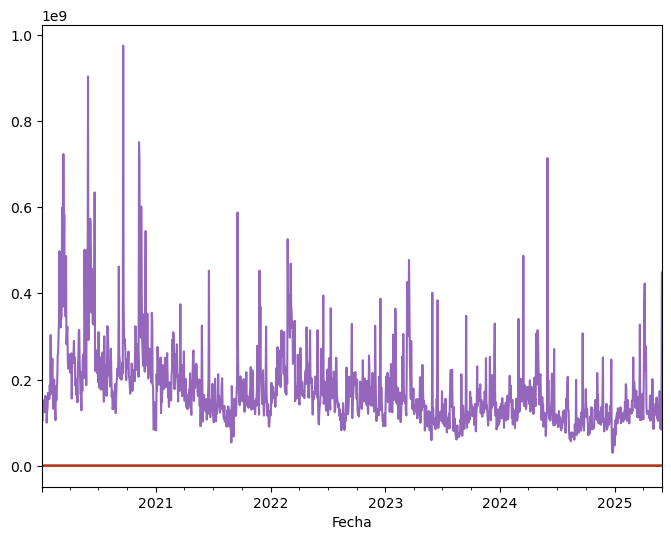

In [20]:
plt.rcParams["figure.figsize"] = (8,6)
IBEX.plot(legend=False)
plt.show()

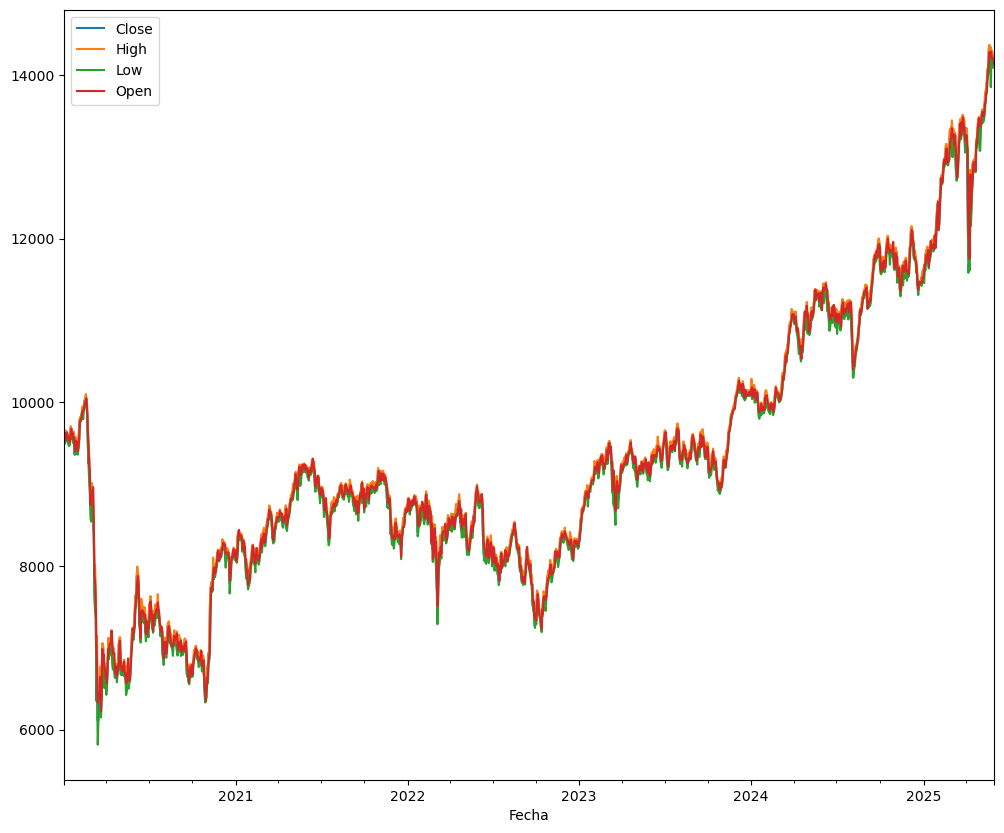

In [21]:
plt.rcParams["figure.figsize"] = (12,10)
IBEX[['Close','High','Low',"Open"]].plot()
plt.show()


Podemos definir una función que calcule el test de Dickey Fuller para la estacionariedad de la serie. De esta forma, en cualquier momento, introduciendo el vector de valores de la serie, obtendremos el contraste de hipótesis. 

H0: La serie NO es estacionaria
H1: La serie no es estacionaria

Por tanto, nos interesará que el contraste de hipótesis sea rechazado (p-valor < 0.05). 

In [22]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [23]:
test_stationarity(IBEX['Close'])

Results of Dickey-Fuller Test:
Test Statistic                    0.177970
p-value                           0.970999
#Lags Used                        6.000000
Number of Observations Used    1404.000000
Critical Value (1%)              -3.435016
Critical Value (5%)              -2.863601
Critical Value (10%)             -2.567867
dtype: float64


Si el estadístico de prueba es menor que el valor crítico (por ejemplo, menor que -2.86 para el 5%), y el p-value es menor que 0.05, se rechaza la hipótesis nula y la serie es estacionaria.
En tu caso:
El estadístico de prueba (0.019137) es mayor que todos los valores críticos.
El p-value (0.96) es mucho mayor que 0.05.
Conclusión:
No puedes rechazar la hipótesis nula.
La serie IBEX['Close'] NO es estacionaria.
Necesitas diferenciar la serie (restar el valor anterior, por ejemplo) o transformarla para que sea estacionaria antes de aplicar modelos ARIMA.

# Descomposición de la serie

En base a la descomposición descriptiva por medias móviles, se extraen las componentes de tendencia y estacionalidad.

## Descomposición aditiva
Se usa cuando:
La amplitud de la estacionalidad y la varianza son aproximadamente constantes a lo largo del tiempo.
Modelo:
Serie = Tendencia + Estacionalidad + Ruido
Ejemplo:
Las fluctuaciones estacionales son similares en todo el periodo, independientemente del nivel de la serie.





**Descomposición aditiva** 

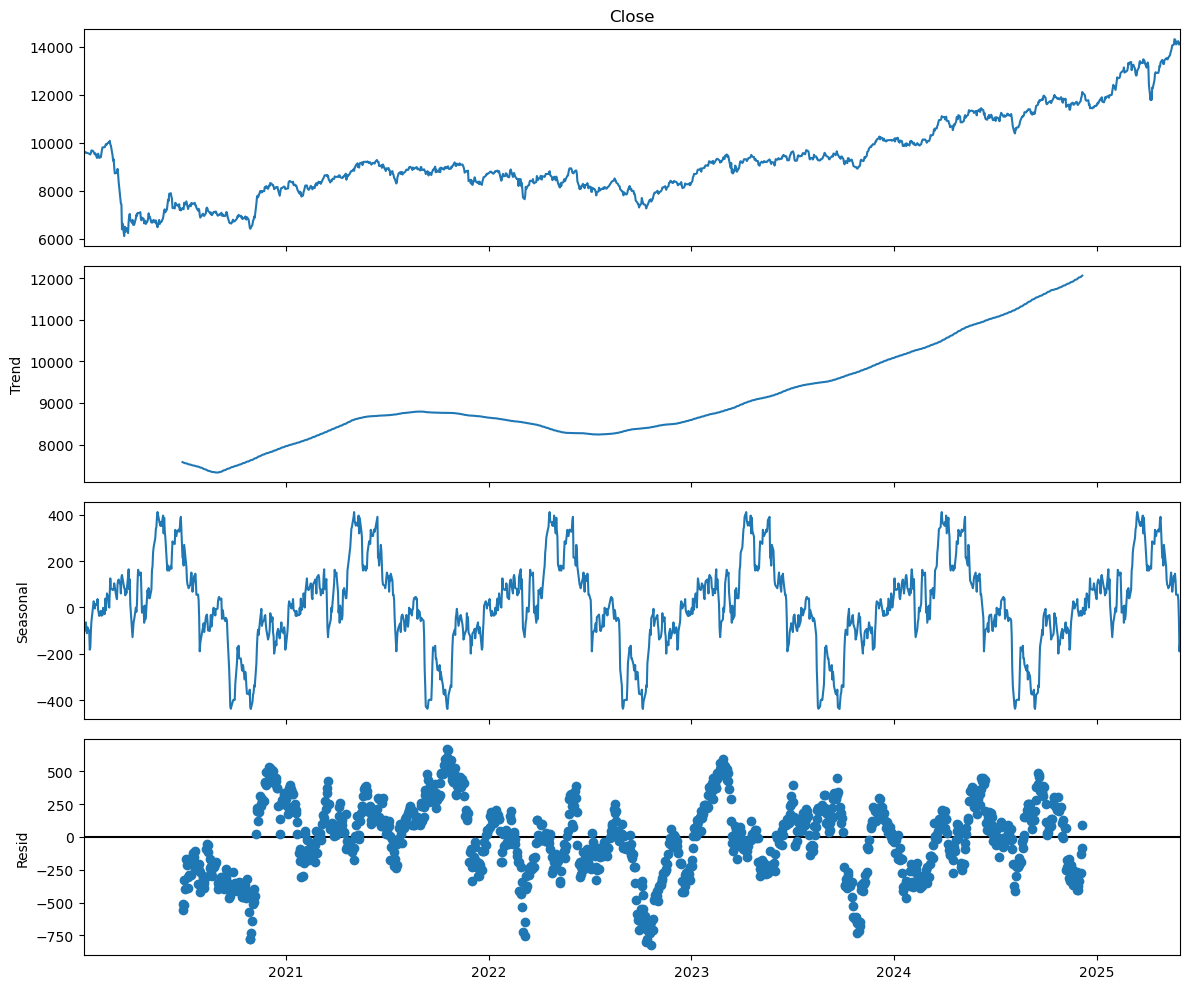

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Aplicar descomposición aditiva
IBEX_desc_Ad = seasonal_decompose(IBEX['Close'], model='additive',period=252)
IBEX_desc_Ad.plot()
plt.show()

1. Serie original (Close)
Muestra la evolución diaria del IBEX 35 desde 2020 hasta 2023.
Se observa una caída fuerte al inicio (probablemente por la pandemia en 2020), seguida de una recuperación y una tendencia alcista sostenida hasta 2023.
2. Tendencia (Trend)
La tendencia suaviza las fluctuaciones diarias y muestra el movimiento de fondo del índice.
Se observa una caída inicial, un periodo lateral y, a partir de 2021, una tendencia claramente ascendente.
Esto indica que, a largo plazo, el IBEX 35 ha ido recuperando valor y creciendo.
3. Estacionalidad (Seasonal)
Aquí se muestran los patrones que se repiten cada año (periodo=252 días hábiles).
Se observan ciclos regulares de subidas y bajadas, lo que sugiere cierta estacionalidad en el comportamiento del índice.
Estos patrones pueden deberse a factores económicos, resultados empresariales, o ciclos anuales del mercado.
4. Residuos (Resid)
Los residuos son lo que queda tras eliminar tendencia y estacionalidad.
Se observa que los residuos están centrados en torno a cero, pero hay periodos con mayor dispersión (volatilidad), especialmente en 2020 y 2023.
No se aprecian patrones claros, lo que es bueno: indica que la mayor parte de la estructura de la serie está explicada por la tendencia y la estacionalidad.

## Conclusión
La serie tiene una fuerte tendencia y cierta estacionalidad anual.
Los residuos parecen ruido blanco, aunque hay periodos de mayor volatilidad.
La serie original NO es estacionaria (como viste en el test Dickey-Fuller), por lo que debes diferenciarla antes de aplicar modelos ARIMA

Evaluamos estacionariedad de los residuos de la descomposición aditiva. Aquí, debido a que la tendencia se calcula por medias móviles, los primeros y últimos valores de la serie son NA, no se calculan. Simplemente saber esto y tener en cuenta solamente los residuos válidos. 

In [25]:
test_stationarity(IBEX_desc_Ad.resid.dropna())

Results of Dickey-Fuller Test:
Test Statistic                   -5.301734
p-value                           0.000005
#Lags Used                        0.000000
Number of Observations Used    1158.000000
Critical Value (1%)              -3.436010
Critical Value (5%)              -2.864039
Critical Value (10%)             -2.568101
dtype: float64


Interpretación de los resultados
Test Statistic: -5.186316
p-value: 0.000009
Critical Value (5%): -2.864103
¿Qué significa esto?
El estadístico de prueba es mucho menor que todos los valores críticos (por ejemplo, -5.18 < -2.86).
El p-value es mucho menor que 0.05.
Conclusión
Rechazas la hipótesis nula: Los residuos son estacionarios.
Esto indica que, tras eliminar tendencia y estacionalidad, la parte no explicada de la serie (los residuos) no tiene raíz unitaria y se comporta como ruido blanco.
Es una buena señal para el modelado ARIMA, ya que la parte que queda tras quitar tendencia y estacionalidad es estacionaria.
Resumen:
Tus residuos son estacionarios.
Ahora puedes continuar con el modelado ARIMA sobre la serie diferenciada o sobre los residuos, según tu objetivo.


## Descomposición multiplicativa
Se usa cuando:
La amplitud de la estacionalidad y la varianza aumentan o disminuyen proporcionalmente al nivel de la serie.
Modelo:
Serie = Tendencia × Estacionalidad × Ruido
Ejemplo:
Las fluctuaciones estacionales son mayores cuando el nivel de la serie es alto y menores cuando es bajo.

**Descomposición multiplicativa** 

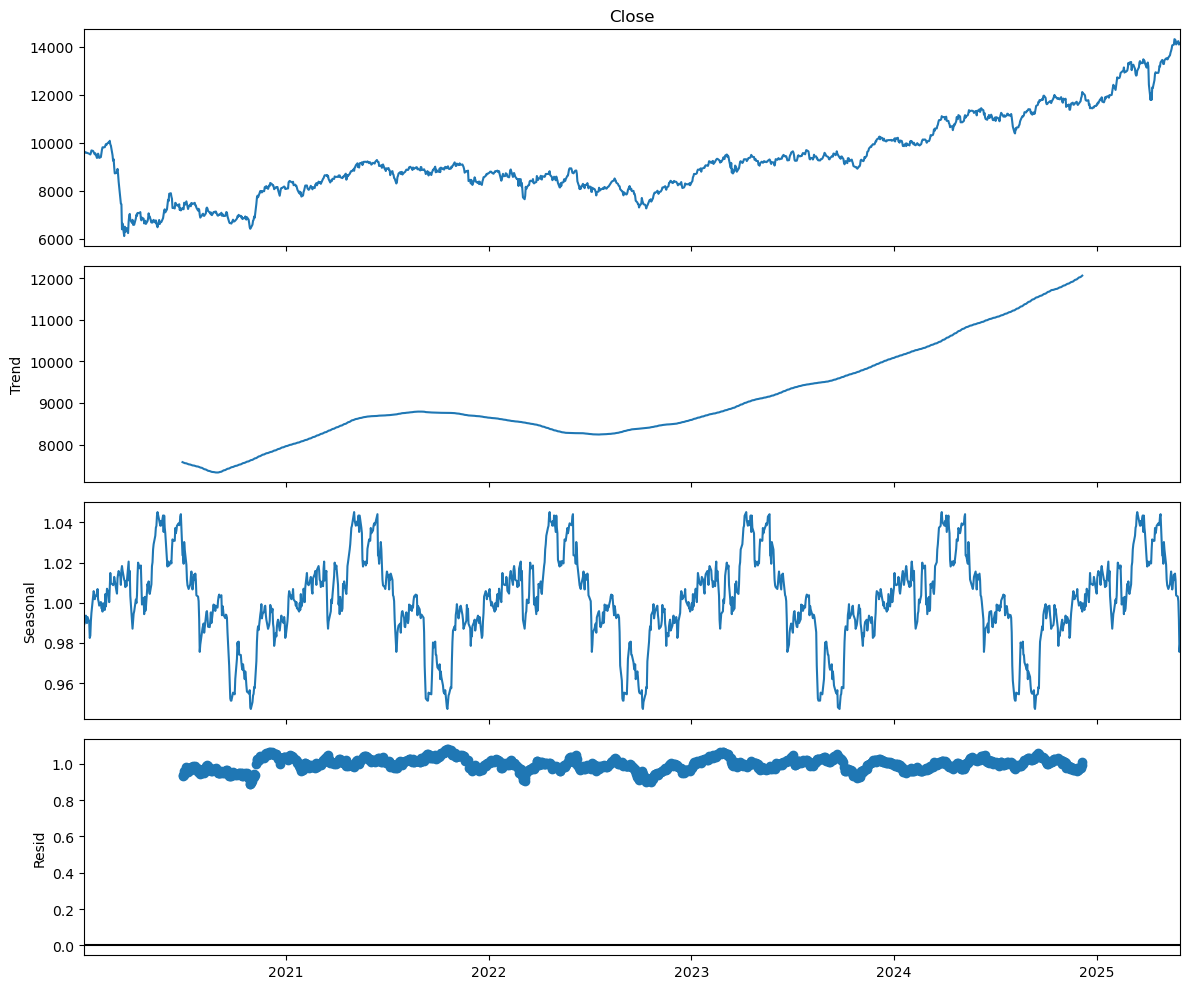

In [26]:
# Aplicar descomposición aditiva
IBEX_desc_Mul = seasonal_decompose(IBEX['Close'], model='multiplicative',period=252)
IBEX_desc_Mul.plot()
plt.show()

1. Serie original (Close)
Es la evolución diaria del IBEX 35 desde 2020 hasta 2023.
Se observa una caída fuerte al inicio (pandemia), seguida de una recuperación y una tendencia alcista sostenida.
2. Tendencia (Trend)
Refleja el movimiento de fondo del índice, eliminando fluctuaciones estacionales y ruido.
Se observa una caída inicial, un periodo lateral y, desde 2021, una tendencia claramente ascendente.
3. Estacionalidad (Seasonal)
Muestra los patrones que se repiten de forma regular (anualmente, ya que el periodo es 252 días hábiles).
Los valores están en torno a 1, lo que indica que la estacionalidad afecta de forma proporcional (multiplicativa) al valor de la serie.
Hay ciclos regulares de subidas y bajadas, lo que sugiere cierta estacionalidad en el comportamiento del índice.
4. Residuos (Resid)
Es lo que queda tras eliminar tendencia y estacionalidad.
Los residuos están centrados en torno a 1 (por la naturaleza multiplicativa), y no muestran patrones claros, lo que indica que la mayor parte de la estructura de la serie está explicada por la tendencia y la estacionalidad.
Si los residuos parecen ruido blanco, la descomposición es adecuada.
Conclusión
La serie tiene una fuerte tendencia y estacionalidad anual.
La descomposición multiplicativa es útil cuando los efectos estacionales y de tendencia son proporcionales al nivel de la serie.
Los residuos parecen aleatorios, lo que es bueno para el modelado posterior

In [27]:
test_stationarity(IBEX_desc_Mul.resid.dropna())

Results of Dickey-Fuller Test:
Test Statistic                   -5.132706
p-value                           0.000012
#Lags Used                        0.000000
Number of Observations Used    1158.000000
Critical Value (1%)              -3.436010
Critical Value (5%)              -2.864039
Critical Value (10%)             -2.568101
dtype: float64


Resultados
Test Statistic: -5.030718
p-value: 0.000019
#Lags Used: 3
Number of Observations Used: 1129
Critical Value (1%): -3.436155
Critical Value (5%): -2.864103
Critical Value (10%): -2.568135
Interpretación
El estadístico de prueba (-5.03) es mucho menor que todos los valores críticos (por ejemplo, -5.03 < -2.86 para el 5%).
El p-value (0.000019) es mucho menor que 0.05.

## Conclusión
Rechazas la hipótesis nula: los residuos son estacionarios.
Esto significa que, tras eliminar tendencia y estacionalidad (modelo multiplicativo), la parte no explicada de la serie se comporta como ruido blanco.
Es una muy buena señal para el modelado ARIMA, ya que los residuos no presentan patrones sistemáticos.
Resumen:
Tus residuos tras la descomposición multiplicativa son estacionarios. Puedes continuar con el modelado ARIMA sobre la serie diferenciada o sobre los residuos, según tu objetivo.

In [28]:
def seasonal_plot(df, season='year', index='month', column=None):
    """Makes a seasonal plot of one column of the input dataframe. Considers the first columns by default.
    
    Arguments:
    
    - df (Pandas DataFrame): DataFrame indexed by Datetime (see `parse_dates` parameter when reading a CSV);
    - season (string): the season that you want to considering when doing the plot, e.g., year, month, etc.;
    - index (string): corresponds to the X axis of the plot. You should choose based on the index period that you're using;
    - column (string, optional): the DataFrame column to consider. Picks the first one by default.
    """
    if column == None:
        column = df.columns[0]
        
    piv_index = getattr(df.index, index)
    piv_season = getattr(df.index, season)
    
    piv = pd.pivot_table(df, index=piv_index, columns=piv_season, values=[column])
    piv.plot(figsize=(12,8))

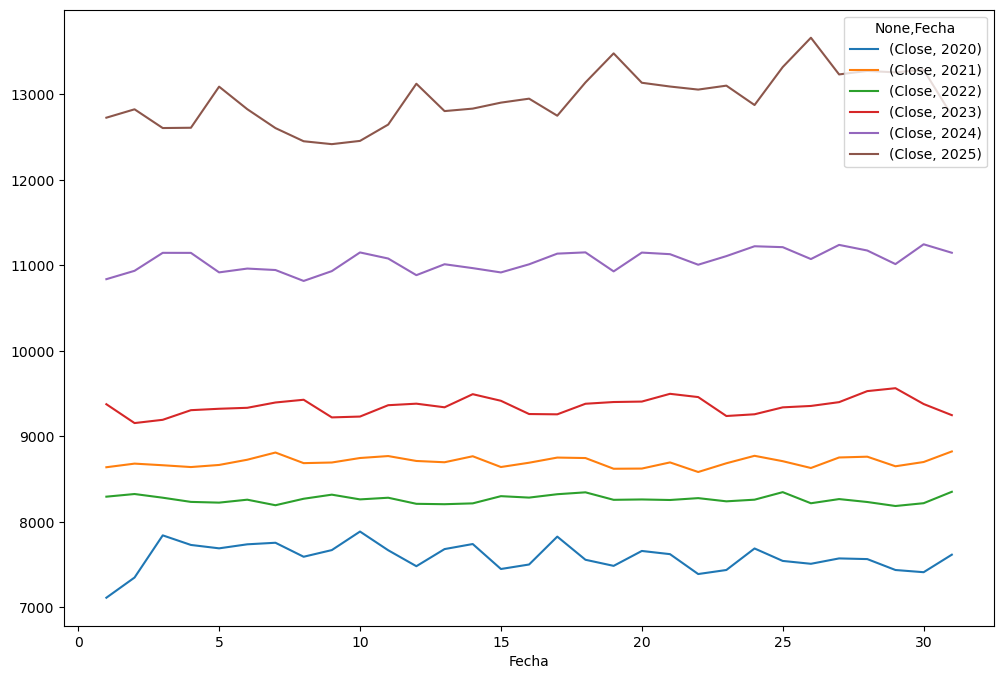

In [29]:
seasonal_plot(IBEX,index='day')
plt.show()

#### Estabilización de la varianza. Transformación Logaritmica

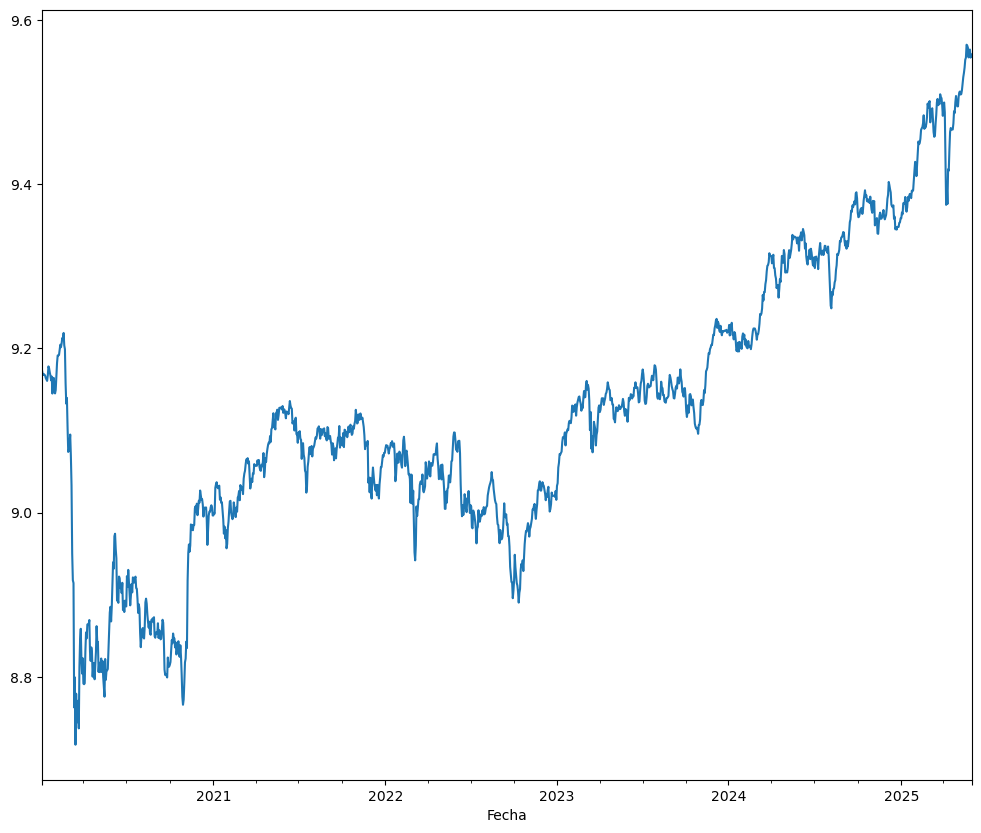

In [30]:
IBEXLog = np.log(IBEX['Close'])
IBEXLog.plot()
plt.show()

#### Diferenciación regular

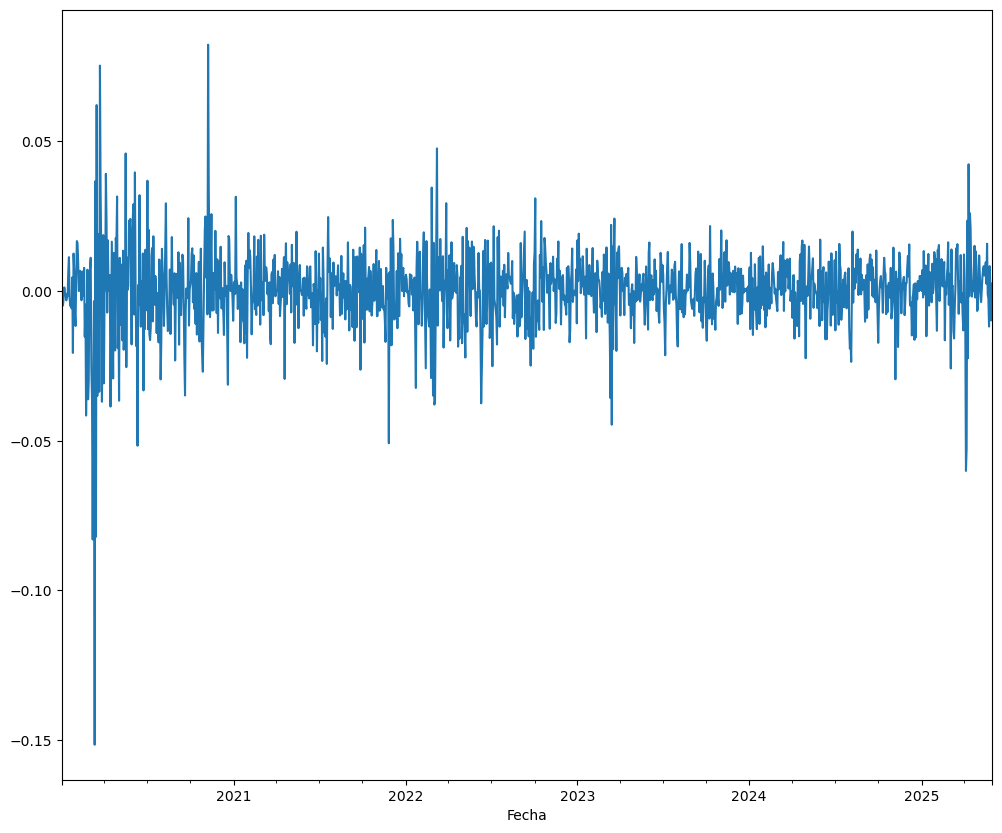

In [31]:
IBEXLog_diff_1 = IBEXLog.diff(periods=1)
IBEXLog_diff_1.plot()
plt.show()

#### Diferenciación estacional

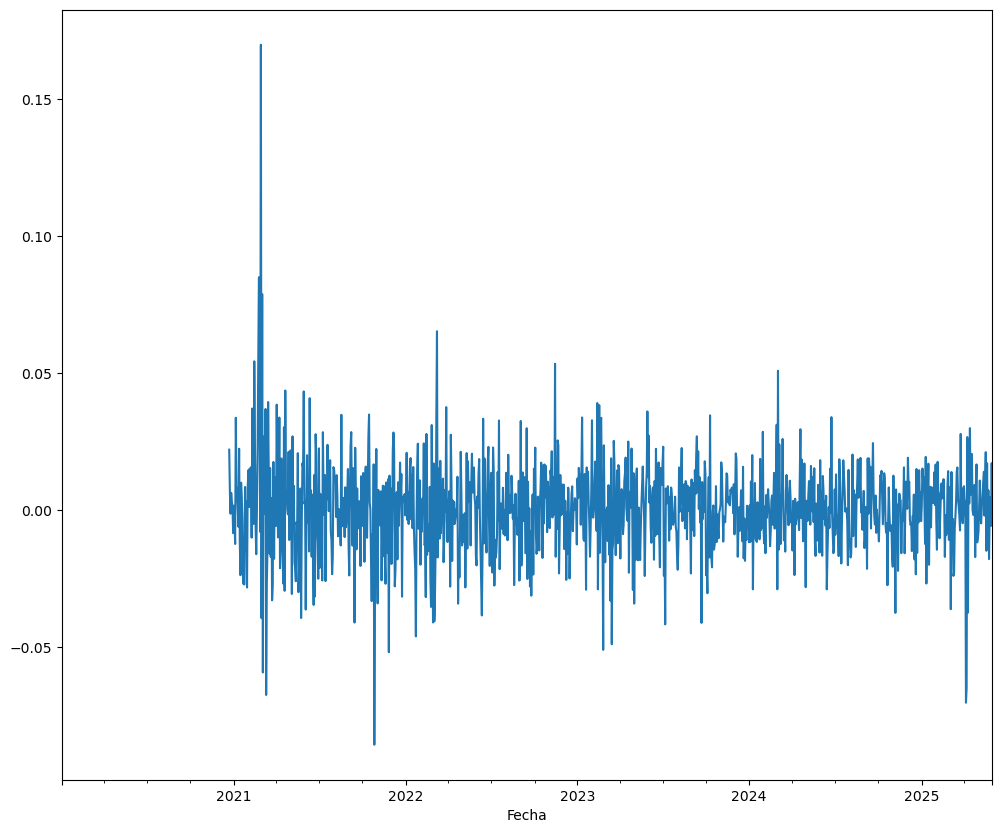

In [32]:
IBEXLog_diff_1_252 = IBEXLog_diff_1.diff(periods=252)
IBEXLog_diff_1_252.plot()
plt.show()


#### Comprobación de estacionariedad

In [33]:
test_stationarity(IBEXLog_diff_1_252.dropna(inplace=False))

Results of Dickey-Fuller Test:
Test Statistic                -1.165368e+01
p-value                        2.009047e-21
#Lags Used                     6.000000e+00
Number of Observations Used    1.151000e+03
Critical Value (1%)           -3.436044e+00
Critical Value (5%)           -2.864054e+00
Critical Value (10%)          -2.568109e+00
dtype: float64


Resultados
Test Statistic: -13.08637
p-value: 1.83e-24 (muy cercano a cero)
#Lags Used: 23
Number of Observations Used: 1356
Critical Value (1%): -3.435182
Critical Value (5%): -2.863674
Critical Value (10%): -2.567906
Interpretación
El estadístico de prueba (-13.09) es mucho menor que todos los valores críticos (por ejemplo, -13.09 < -3.43).
El p-value es muchísimo menor que 0.05 (prácticamente cero).
Conclusión
Rechazas la hipótesis nula: la serie es estacionaria.
Esto significa que, tras la diferenciación logarítmica diaria y anual, tu serie no tiene raíz unitaria y no presenta tendencia ni estacionalidad remanente.
Puedes usar modelos ARIMA/SARIMA sobre esta serie, ya que cumple el requisito de estacionariedad.

## Autocorrelaciones 

In [34]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

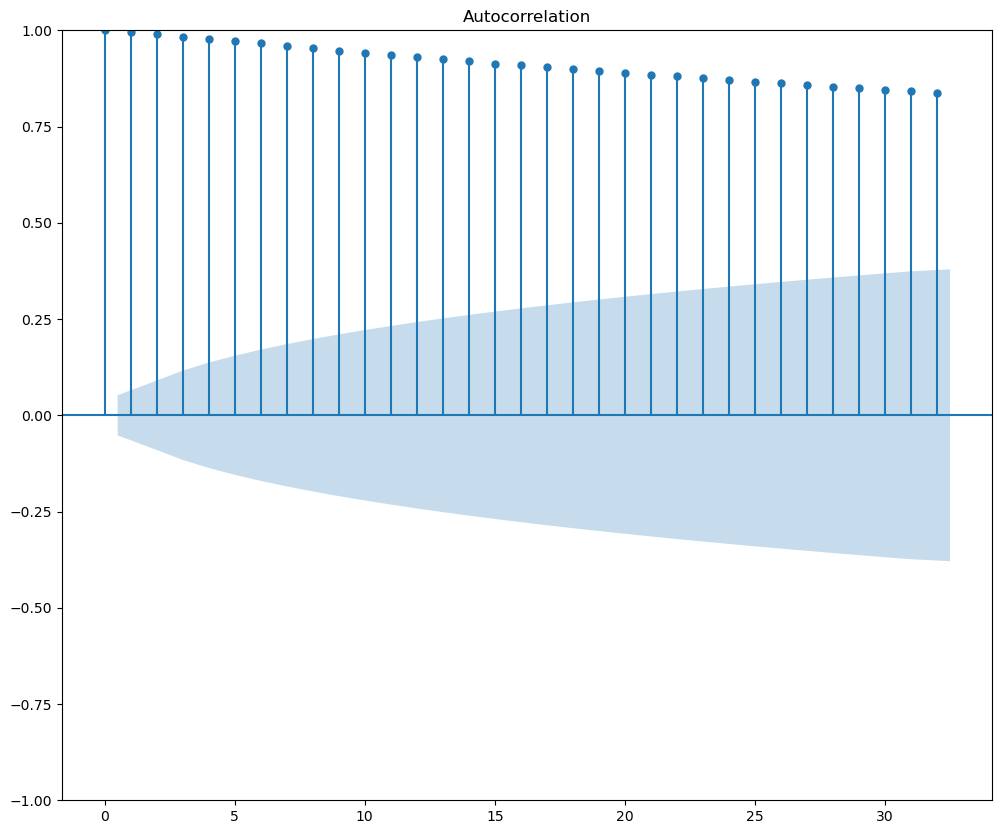

In [35]:
plot_acf(IBEX['Close'].dropna(inplace=False))
plt.show()

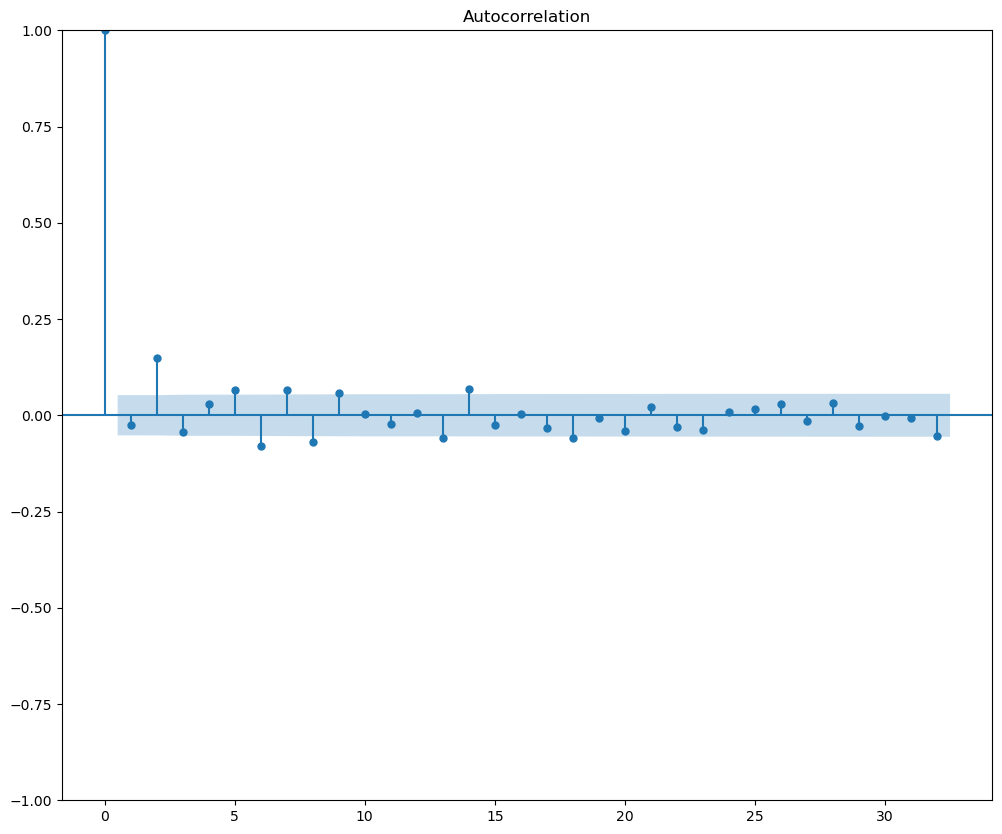

In [36]:
plot_acf(IBEXLog_diff_1.dropna(inplace=False))
plt.show()


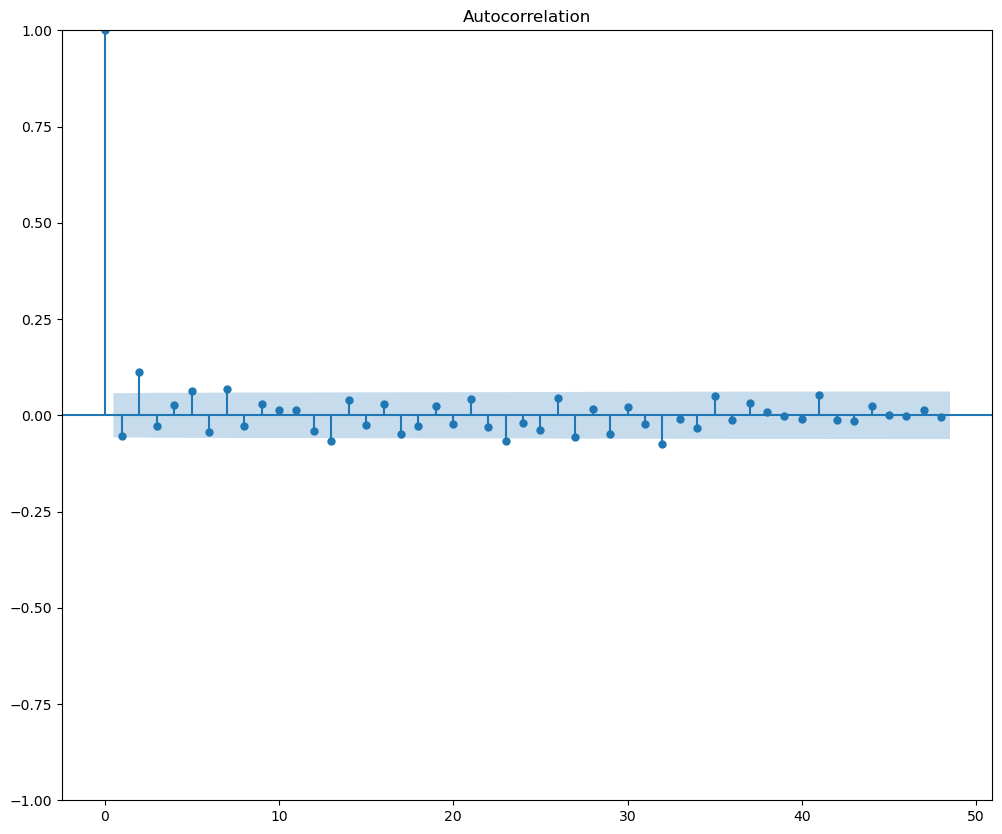

In [37]:
plot_acf(IBEXLog_diff_1_252.dropna(inplace=False), lags=48)
plt.show()

## 1. Serie original (última imagen, ACF de IBEX['Close'])
Observación:
La autocorrelación es muy alta y decrece lentamente.
Interpretación:
La serie original tiene fuerte tendencia y no es estacionaria.
Esto es típico en precios financieros: los valores de hoy dependen mucho de los de ayer.
Insight:
Es necesario diferenciar la serie antes de modelar.

## 2. Retornos logarítmicos diarios (segunda imagen, ACF de IBEXLog_diff_1)
Observación:
La mayoría de los coeficientes de autocorrelación están dentro del intervalo de confianza (zona azul), salvo el primer lag (que siempre es 1).
Interpretación:
La serie ya no tiene tendencia y es mucho más estacionaria.
No hay autocorrelaciones significativas, lo que es típico en retornos financieros.
Insight:
Has eliminado la tendencia correctamente. La serie está lista para modelado ARIMA simple si no hay estacionalidad.

## 3. Retornos logarítmicos diferenciados anual (primera imagen, ACF de IBEXLog_diff_1_252)
Observación:
Todos los lags (excepto el primero) están dentro del intervalo de confianza.
Interpretación:
No hay autocorrelación significativa: la serie es ruido blanco.
Insight:
Tras la diferenciación diaria y anual, la serie es plenamente estacionaria y no muestra patrones remanentes.
Esto es ideal para ajustar modelos ARIMA/SARIMA, ya que la serie cumple los supuestos.

In [38]:
sm.stats.acorr_ljungbox(IBEXLog_diff_1_252.dropna(inplace=False), lags=12, return_df=True)

,lb_stat,lb_pvalue
1,3.396082,0.065351
2,18.275251,0.000108
3,19.147035,0.000255
4,19.908419,0.000521
5,24.419233,0.000180
6,26.609563,0.000171
7,32.079657,0.000039
8,33.054573,0.000060
9,34.135902,0.000085
10,34.362464,0.000160


## Modelos de suavizado

In [39]:
import statsmodels.tsa.holtwinters as ets
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

IBEXn = IBEX['Close']

# Entrenamiento: desde el inicio hasta el 2024-12-31
IBEXn_tr = IBEXn[:'2024-12-31']

# Test: desde el 2025-01-01 hasta el final
IBEXn_tst = IBEXn['2025-01-02':]

IBEXn_tr
IBEXn_tst

Fecha
2025-01-02    11676.900391
2025-01-03    11651.599609
2025-01-06    11808.200195
2025-01-07    11811.900391
2025-01-08    11798.099609
                  ...     
2025-05-26    14221.599609
2025-05-27    14239.900391
2025-05-28    14100.599609
2025-05-29    14116.599609
2025-05-30    14152.200195
Freq: B, Name: Close, Length: 107, dtype: float64

In [40]:
IBEXn_tr

Fecha
2020-01-03     9646.599609
2020-01-06     9600.900391
2020-01-07     9579.799805
2020-01-08     9591.400391
2020-01-09     9581.799805
                  ...     
2024-12-25    11473.900391
2024-12-26    11473.900391
2024-12-27    11531.599609
2024-12-30    11536.799805
2024-12-31    11595.000000
Freq: B, Name: Close, Length: 1303, dtype: float64

Definimos aquí una función para evaluar un modelo (será válido para modelos de suavizado y arima de statsmodels pero no para auto_arima...distintos valores de salida y ajustaremos luego la función para ello)

In [41]:
#forecast_accuracy(fc, test.values)

# Función para evaluar modelo
def eval_model(model,tr,tst,name='Model',lags=12):
    lb = np.mean(sm.stats.acorr_ljungbox(model.resid, lags=lags, return_df=True).lb_pvalue)
    pred = model.forecast(steps=len(tst))
    fig1, ax = plt.subplots()
    ax.plot(tr, label='training')
    ax.plot(tst, label='test')
    ax.plot(pred, label='prediction')
    plt.legend(loc='upper left')
    tit = name + ":  LjungBox p-value --> " + str(lb) + "\n MAPE: " + str(round(mean_absolute_percentage_error(tst, pred)*100,2)) + "%"
    plt.title(tit)
    plt.ylabel('Pasajeros')
    plt.xlabel('Date')
    plt.show()
    print(lb)

#### Suavizado Simple

Suavizado simple, ya sabemos que no va a ajustar bien pues es para series sin tendencia y estacionalidad. Solo por ver como ajustarlo en caso de necesidad. Esperamos predicciones constantes para la ventana de test.

In [42]:
ses = ets.SimpleExpSmoothing(IBEXn_tr).fit()

Evaluación del modelo SES. Suavizado Exponencial Simple

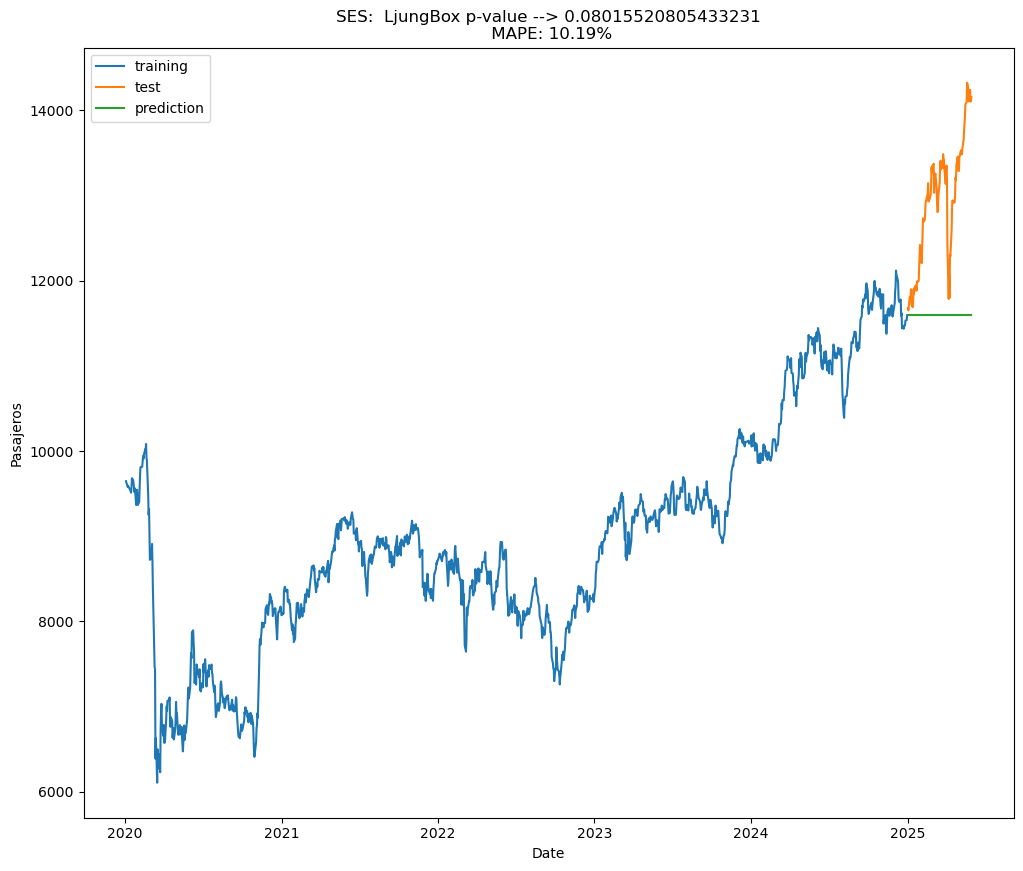

0.08015520805433231


In [43]:
# Evaluar SES
eval_model(ses,IBEXn_tr,IBEXn_tst,'SES')

Métricas clave
LjungBox p-value ≈ 0.08
No hay autocorrelación significativa en los residuos (p-value > 0.05), lo cual es bueno.
MAPE: 10.17%
El error porcentual medio absoluto es del 10.17%. Es un error moderado, pero para series con tendencia y estacionalidad, SES suele quedarse corto.
¿Qué significa esto?
El modelo SES no captura bien la tendencia ni la estacionalidad (por eso la predicción es casi constante).
El p-value indica que los residuos son casi ruido blanco, pero el modelo no es adecuado para series con tendencia/estacionalidad.
El MAPE te da una idea de la precisión: cuanto menor, mejor.
¿Qué hacer ahora?
Prueba modelos más avanzados: Holt (para tendencia) o Holt-Winters (para tendencia y estacionalidad), o ARIMA/SARIMA.
SES solo es útil para series sin tendencia ni estacionalidad.
Resumen:

El modelo SES no es suficiente para tu serie IBEX, pero tu flujo de evaluación es correcto.
Continúa con modelos que capturen tendencia y estacionalidad para mejorar el ajuste y la predicción.

#### Suavizado doble de Holt

Suavizado doble de Holt, con pendiente pero sin componente estacional. Esperamos una recta con pendiente como predicción.